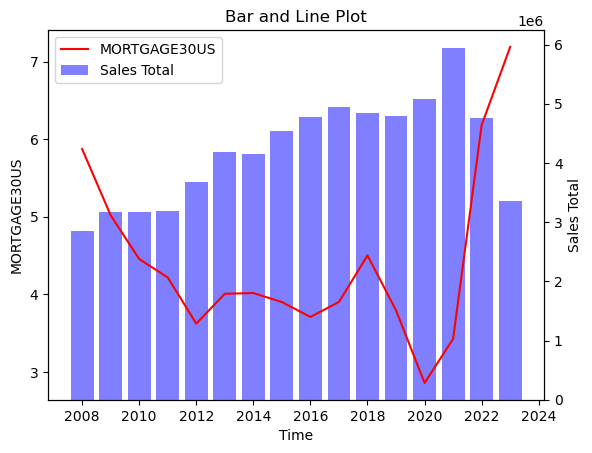

,SalesTotal,MORTGAGE30US
Date,,
2008-12-31,2856194.0,5.874545
2009-12-31,3177498.0,5.020000
2010-12-31,3168842.0,4.455000
2011-12-31,3193166.0,4.217500
2012-12-31,3671475.0,3.621667
2013-12-31,4179090.0,4.006667
2014-12-31,4152446.0,4.015833
2015-12-31,4534551.0,3.900000
2016-12-31,4775844.0,3.707500


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('resources/data_interpolated.csv')
city = 'United States'
df = df[df['CityName'] == city]
df = df[['Date', 'SalesTotal', 'MORTGAGE30US']]
df['MORTGAGE30US'] = df['MORTGAGE30US'].bfill()
df.dropna(subset=['SalesTotal'], inplace=True)

# Convert 'Date' to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate yearly sum of 'SalesTotal' and yearly average of 'MORTGAGE30US'
df = df.resample('Y').agg({'SalesTotal': 'sum', 'MORTGAGE30US': 'mean'})

# Plot the data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Bar plot
bar = ax2.bar(df.index.year, df['SalesTotal'], color='blue', zorder=0, alpha=.5)

# Line plot
line, = ax1.plot(df.index.year, df['MORTGAGE30US'], color='red', zorder=1)

# Set labels and title
ax1.set_xlabel('Time')
ax1.set_ylabel('MORTGAGE30US')
ax2.set_ylabel('Sales Total')
plt.title('Bar and Line Plot')

# Add legends
plt.legend([line, bar], ['MORTGAGE30US', 'Sales Total'])

# Move the line plot to the front
ax1.set_zorder(ax2.get_zorder() + 1)
ax1.patch.set_visible(False)

plt.show()



df.head(20)

In [12]:
import pandas as pd
import matplotlib
# Ensure matplotlib does not use any Xwindows backend.
matplotlib.use('Agg')
import matplotlib.pyplot as plt

def plot_bar_and_line( city = 'United States', col = 'MORTGAGE30US'):  # Renamed function
    df = pd.read_csv('resources/data_interpolated.csv')
    df = df[df['CityName'] == city]
    df = df[['Date', 'SalesTotal', 'MORTGAGE30US']]
    df['MORTGAGE30US'] = df['MORTGAGE30US'].bfill()
    df.dropna(subset=['SalesTotal'], inplace=True)

    # Convert 'Date' to datetime and set it as index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Calculate yearly sum of 'SalesTotal' and yearly average of 'MORTGAGE30US'
    df = df.resample('Y').agg({'SalesTotal': 'sum', 'MORTGAGE30US': 'mean'})

    # Plot the data
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    # Bar plot
    bar = ax2.bar(df.index.year, df['SalesTotal'], color='blue', zorder=0, alpha=.5)

    # Line plot
    line, = ax1.plot(df.index.year, df['MORTGAGE30US'], color='red', zorder=1)

    # Set labels and title
    ax1.set_xlabel('Time')
    ax1.set_ylabel('MORTGAGE30US')
    ax2.set_ylabel('Sales Total')
    plt.title('Mortgage Rate and Sales Total Over Time for ' + city)

    # Add legends
    plt.legend([line, bar], ['MORTGAGE30US', 'Sales Total'])

    # Move the line plot to the front
    ax1.set_zorder(ax2.get_zorder() + 1)
    ax1.patch.set_visible(False)
    plt.savefig('static/bar_and_line_plot.svg')

    plt.close()
if __name__ == '__main__':
    # Example usage
    city = 'United States'
    # column1 = 'SalesTotal'
    # column2 = 'MORTGAGE30US'
    plot_bar_and_line(city)